In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from statsmodels.stats.multitest import multipletests
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import levene

pd.options.display.float_format = '{:.2f}'.format

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# **Student Information**

### **Student ID**

StudentID: A unique identifier assigned to each student (1001 to 3392).

#### **Demographic Details**

Age: The age of the students ranges from 15 to 18 years.

Gender: Gender of the students, where 0 represents Male and 1 represents Female.

Ethnicity: The ethnicity of the students, coded as follows:

0: Caucasian

1: African American

2: Asian

3: Other

### **ParentalEducation**:

0: None

1: High School

2: Some College

3: Bachelor's

4: Higher

### **Study Habits**

StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.

Absences: Number of absences during the school year, ranging from 0 to 30.

Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.

Parental Involvement

### **ParentalSupport:**

0: None

1: Low

2: Moderate

3: High

4: Very High

### **Extracurricular Activities**

Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.

Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.

Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.

Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.

### **Academic Performance**

GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.

### **GradeClass:**

0: 'A' (GPA >= 3.5)

1: 'B' (3.0 <= GPA < 3.5)

2: 'C' (2.5 <= GPA < 3.0)

3: 'D' (2.0 <= GPA < 2.5)

4: 'F' (GPA < 2.0)


In [2]:
# Import data
df = pd.read_csv("./Student_performance_data.csv")

# View the first few rows of the data
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.83,7,1,2,0,0,1,0,2.93,2.00
1,1002,18,0,0,1,15.41,0,0,1,0,0,0,0,3.04,1.00
2,1003,15,0,2,3,4.21,26,0,2,0,0,0,0,0.11,4.00
3,1004,17,1,0,3,10.03,14,0,3,1,0,0,0,2.05,3.00
4,1005,17,1,0,2,4.67,17,1,3,0,0,0,0,1.29,4.00


# Data Overview

In [3]:
# Check for missing values
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [4]:
# Examine the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


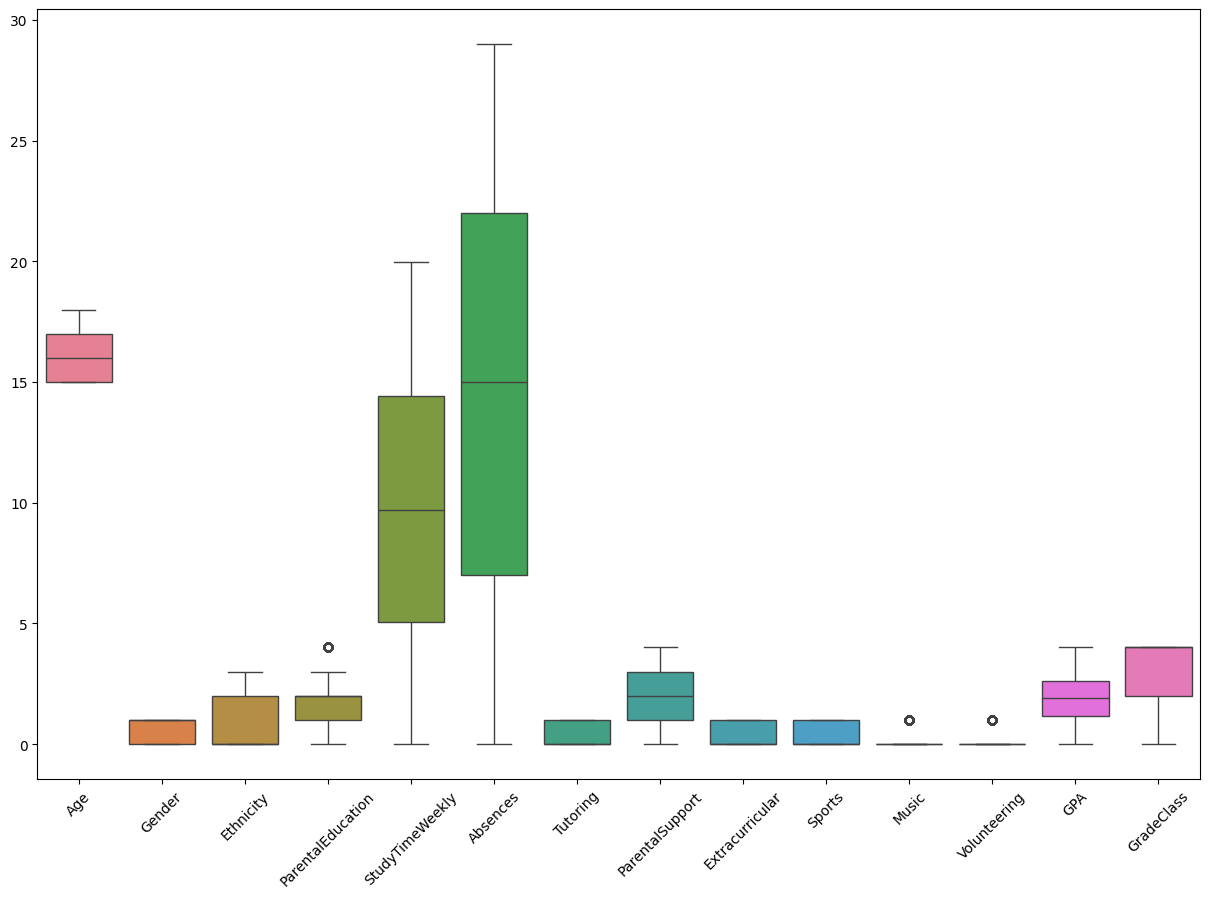

In [5]:
# Look for outliers in all but the "StudentID" column
df_copy = df.copy()
outliers = df_copy.drop("StudentID", axis=1)

# Create a boxplot for each column
plt.figure(figsize=(15, 10))
sns.boxplot(data=outliers)
plt.xticks(rotation=45)
plt.show()

In [6]:
# Looks like there are outliers in ParentalEducation, Music and Volunteering columns
# Let's take a closer look at these columns

# ParentalEducation column
outliers['ParentalEducation'].value_counts()

ParentalEducation
2    934
1    728
3    367
0    243
4    120
Name: count, dtype: int64

**Looks like the minority of parents have education beyond a Bachelor's degree (120). Therefore, we should not drop these data points from our data.**

In [7]:
# Music column
outliers['Music'].value_counts()

Music
0    1921
1     471
Name: count, dtype: int64

**Looks like the minority of students take part in Music activities (471). Therefore, we should not drop these data points from our data.**

In [8]:
# Volunteering column
outliers['Volunteering'].value_counts()

Volunteering
0    2016
1     376
Name: count, dtype: int64

**Looks like the minority of students take part in Volunteering (376). Therefore, we should not drop these data points from our data.**

# Descriptive Statistics

In [9]:
# Summary statistics without StudentID
df.drop("StudentID", axis=1).describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00
mean,16.47,0.51,0.88,1.75,9.77,14.54,0.30,2.12,0.38,0.30,0.20,0.16,1.91,2.98
std,1.12,0.50,1.03,1.00,5.65,8.47,0.46,1.12,0.49,0.46,0.40,0.36,0.92,1.23
min,15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,15.00,0.00,0.00,1.00,5.04,7.00,0.00,1.00,0.00,0.00,0.00,0.00,1.17,2.00
50%,16.00,1.00,0.00,2.00,9.71,15.00,0.00,2.00,0.00,0.00,0.00,0.00,1.89,4.00
75%,17.00,1.00,2.00,2.00,14.41,22.00,1.00,3.00,1.00,1.00,0.00,0.00,2.62,4.00
max,18.00,1.00,3.00,4.00,19.98,29.00,1.00,4.00,1.00,1.00,1.00,1.00,4.00,4.00


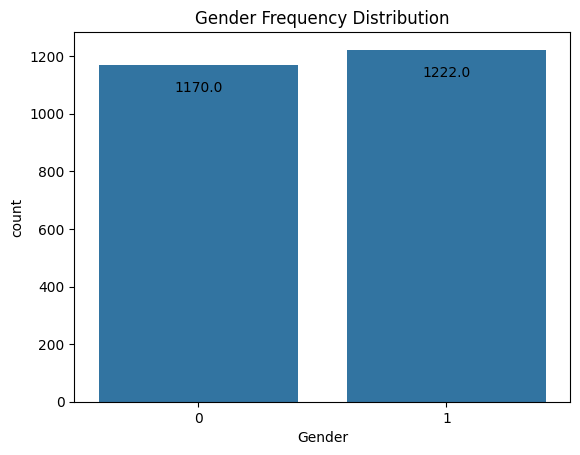

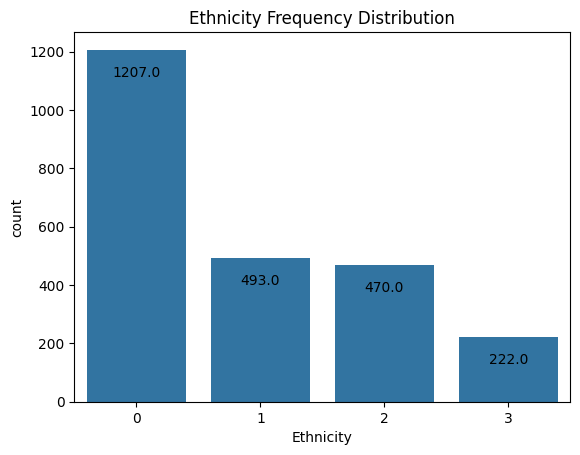

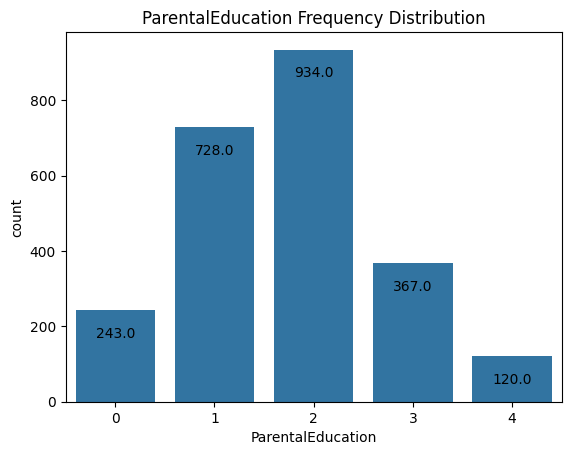

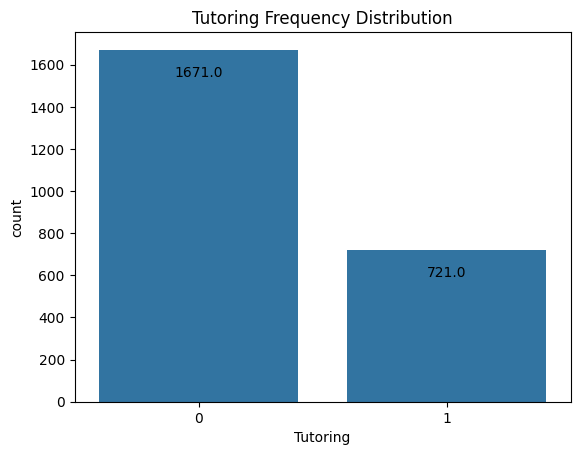

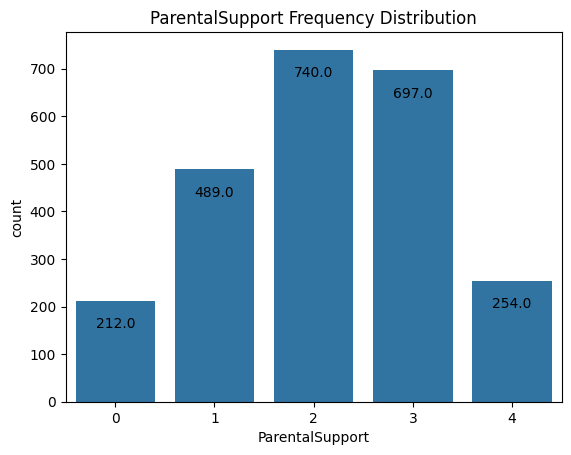

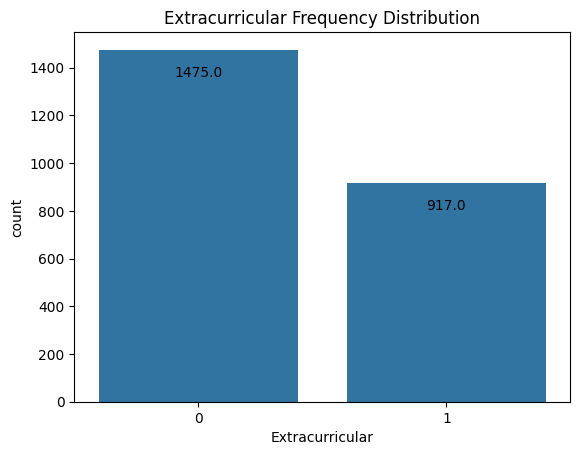

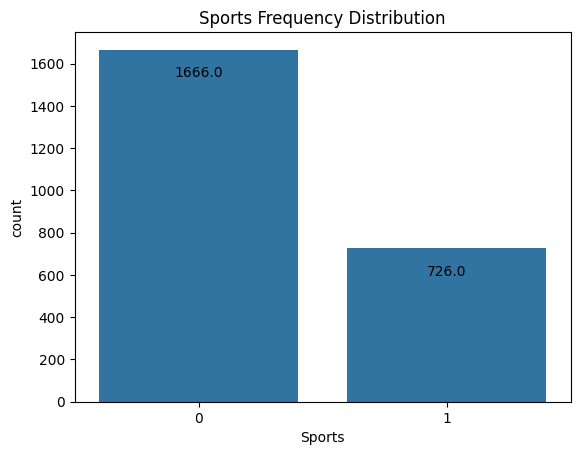

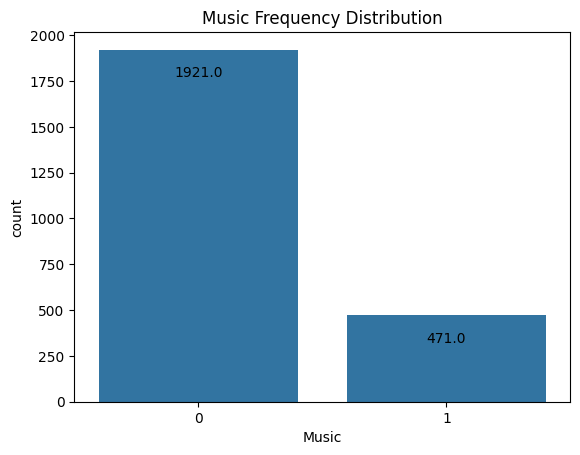

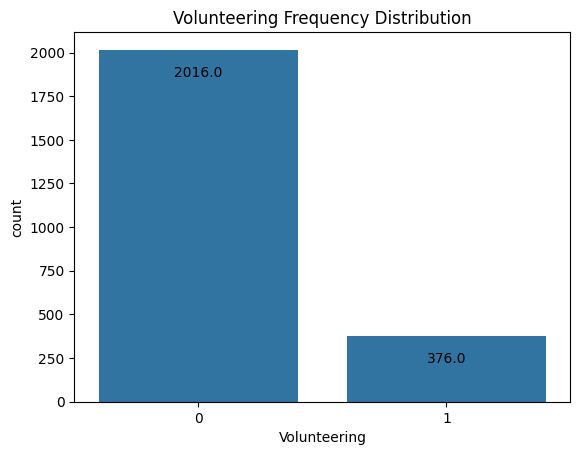

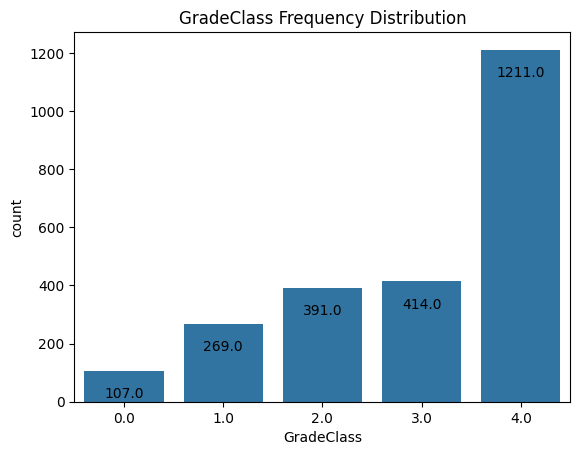

In [10]:
# Frequency distribution of the categorical variables
# For example, the column Sports is a binary categorical column
columns_to_categorical = ['Gender','Ethnicity','ParentalEducation','Tutoring','ParentalSupport', 'Extracurricular', 
                          'Sports','Music','Volunteering','GradeClass']

for column in columns_to_categorical:
    df_copy[column] = df_copy[column].astype('category')
    sns.countplot(x=column, data=df_copy)
    # Add title
    plt.title(f'{column} Frequency Distribution')
    # Add the count above each bar
    for p in plt.gca().patches:
        plt.gca().annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black')
    plt.show()


# Correlation Analysis

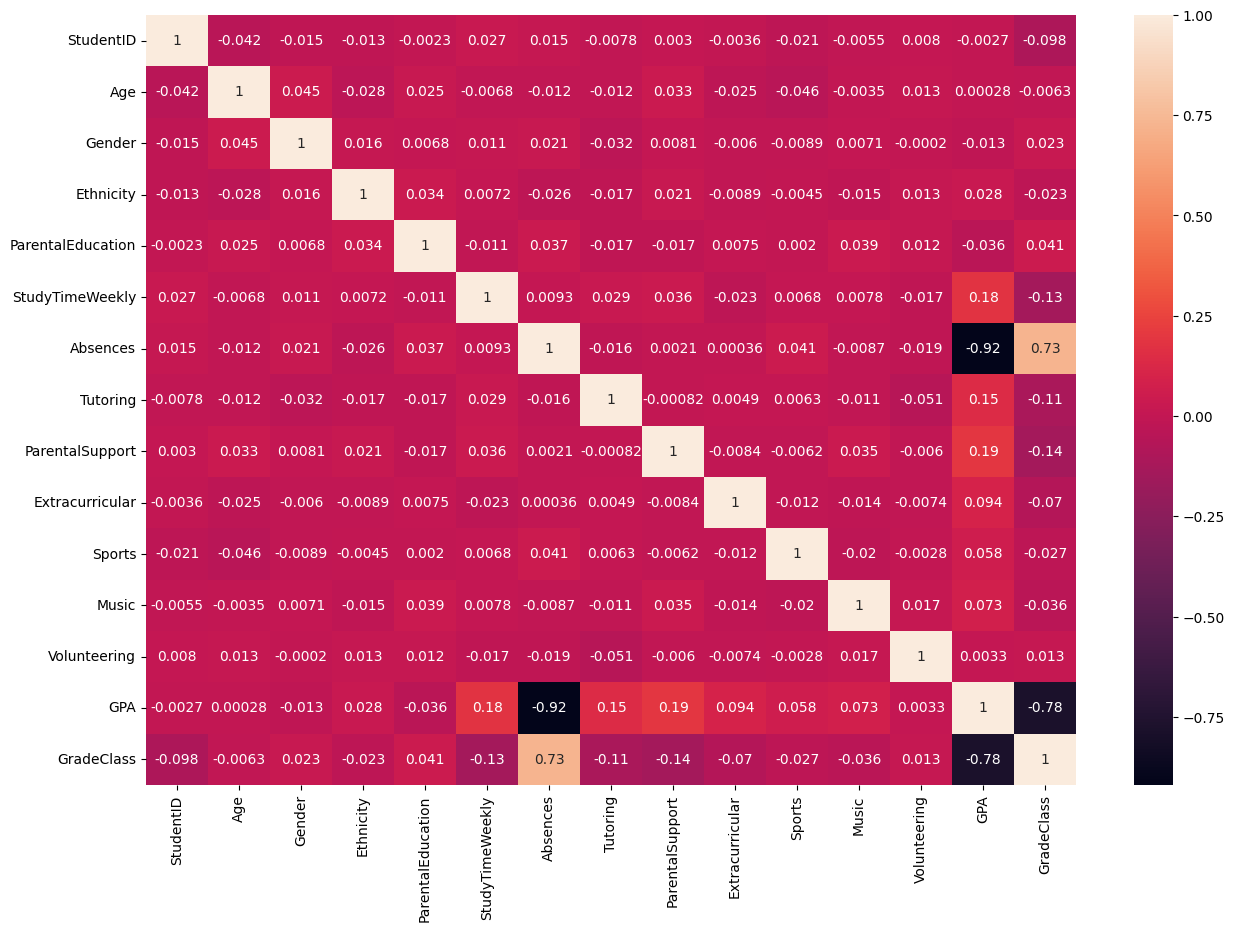

In [11]:
# Correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df_copy.corr(), annot=True)
plt.show()

## Notes from the Correlation Analysis

* Strong negative correlation between Absences and GPA (-0.92): This indicates that as the number of absences increases, GPA tends to decrease significantly. This is the strongest correlation in the dataset.

* Strong negative correlation between GPA and GradeClass (-0.78): This is expected, as GradeClass is derived from GPA. The negative correlation occurs because lower GPA values correspond to higher (worse) GradeClass values.

* Strong positive correlation between Absences and GradeClass (0.73): This aligns with the previous two correlations, suggesting that more absences are associated with worse grade classifications.

* Weak positive correlation between StudyTimeWeekly and GPA (0.18): This suggests that increased study time is associated with slightly higher GPAs, though the relationship is not very strong.

* Weak positive correlations between ParentalSupport and GPA (0.19), and Tutoring and GPA (0.15): These indicate that both parental support and tutoring have a slight positive association with GPA.

* Very weak correlations between demographic factors (Age, Gender, Ethnicity) and academic performance: This suggests that these demographic factors have minimal direct impact on GPA or GradeClass.

* Weak positive correlations between extracurricular activities (Sports, Music, Volunteering) and GPA: These activities show slight positive associations with GPA, but the correlations are relatively weak (0.058, 0.073, and 0.0033 respectively).

* Weak negative correlation between StudyTimeWeekly and GradeClass (-0.13): This indicates that more study time is associated with slightly better grade classifications.

* Most other variables show very weak correlations with each other: This suggests that many of the factors in the dataset are relatively independent of one another.

* No strong multicollinearity among predictor variables: Apart from the expected correlations (like GPA and GradeClass), there are no strong correlations between potential predictor variables, which is good for potential modeling purposes.

In [12]:
# Perform a chi-square test for independence between all pairs of categorical variables
def chi_square_test(crosstab):
    observed_values = crosstab.values
    chi2, p, dof, expected = stats.chi2_contingency(observed_values)
    
    # Calculate Cramer's V for effect size
    n = np.sum(observed_values)
    min_dim = min(crosstab.shape) - 1
    cramer_v = np.sqrt(chi2 / (n * min_dim))
    
    return chi2, p, dof, expected, cramer_v

def perform_chi_square_tests(df):
    # Include both 'category' and 'object' dtypes
    categorical_columns = df.select_dtypes(include=['category', 'object']).columns
    results = []

    for i in range(len(categorical_columns)):
        for j in range(i+1, len(categorical_columns)):
            col1, col2 = categorical_columns[i], categorical_columns[j]
            crosstab = pd.crosstab(df[col1], df[col2])
            
            # Check for minimum expected frequency
            expected = stats.contingency.expected_freq(crosstab)
            if (expected < 5).any():
                print(f"Warning: Expected frequency < 5 for {col1} and {col2}")
                continue
            
            chi2, p, dof, expected, cramer_v = chi_square_test(crosstab)
            results.append({
                'Variable 1': col1,
                'Variable 2': col2,
                'Chi2': chi2,
                'p-value': p,
                'DoF': dof,
                "Cramer's V": cramer_v
            })

    # Adjust p-values for multiple comparisons
    results_df = pd.DataFrame(results)
    results_df['Adjusted p-value'] = multipletests(results_df['p-value'], method='fdr_bh')[1]

    return results_df

# Assuming df_copy is your DataFrame
results = perform_chi_square_tests(df_copy)
results

,Variable 1,Variable 2,Chi2,p-value,DoF,Cramer's V,Adjusted p-value
0,Gender,Ethnicity,1.78,0.62,3,0.03,0.95
1,Gender,ParentalEducation,0.59,0.96,4,0.02,1.00
2,Gender,Tutoring,2.25,0.13,1,0.03,0.67
3,Gender,ParentalSupport,2.07,0.72,4,0.03,0.95
4,Gender,Extracurricular,0.06,0.80,1,0.01,0.95
5,Gender,Sports,0.15,0.70,1,0.01,0.95
6,Gender,Music,0.09,0.77,1,0.01,0.95
7,Gender,Volunteering,0.00,1.00,1,0.00,1.00
8,Gender,GradeClass,1.92,0.75,4,0.03,0.95
9,Ethnicity,ParentalEducation,13.42,0.34,12,0.04,0.95


# Overall Observations From Chi-Square Tests On Gender

* Gender equality: These results suggest a high degree of gender equality in various aspects of the students’ educational experience and background. There are no significant gender-based differences in parental education, support, extracurricular activities, or academic performance.

* Demographic independence: Ethnicity appears to be independent of gender, indicating a balanced ethnic distribution across genders in the student population.

* Equal opportunities: The lack of significant associations between gender and various activities (sports, music, volunteering) suggests equal participation opportunities and interests across genders.

* Academic equity: The absence of a significant relationship between gender and grade class indicates that academic performance is not significantly influenced by gender in this dataset.

* Tutoring consideration: While not statistically significant, the slightly lower p-value for the gender-tutoring relationship might warrant further investigation to ensure equal access to tutoring resources.

* Robustness of other factors: Given the lack of significant gender-based differences, other factors in the dataset (like study time, absences, or specific interventions) may be more influential in determining academic outcomes.

# Questions and Visualizations

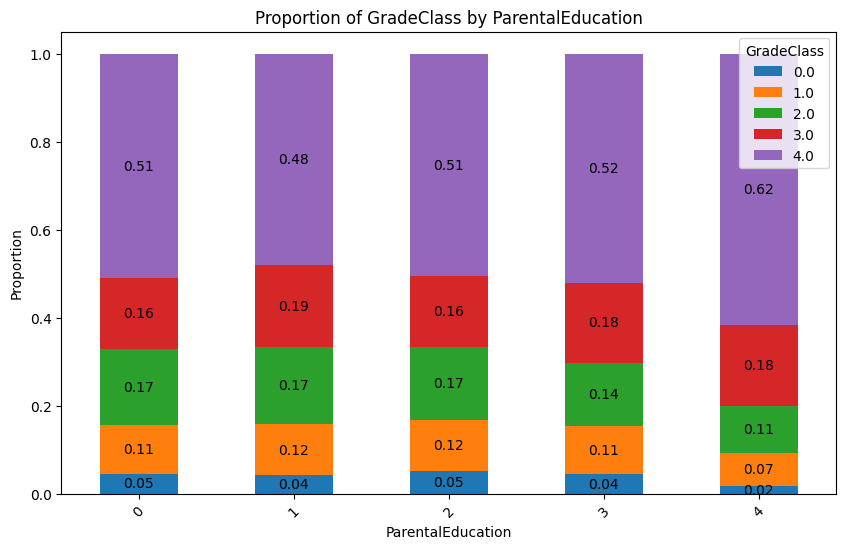

In [13]:
# Question: How does parental education level impact student GPA and GradeClass?
# Let's create a stacked bar chart showing the proportion of each GradeClass for each ParentalEducation level

# Create a crosstab
crosstab = pd.crosstab(df_copy['ParentalEducation'], df_copy['GradeClass'], normalize='index')

# Plot the stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
# Add the counts for each category at the top of each segment
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x()+p.get_width()/2, p.get_y() + p.get_height()/2), 
                       ha='center', va='center', color='black')
plt.title('Proportion of GradeClass by ParentalEducation')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

* Grade Class 4.0 dominance: Across all parental education levels, Grade Class 4.0 (purple) consistently makes up the largest proportion, ranging from 48% to 62% of students.
* Increasing trend for lower grades: There's a general trend of Grade Class 4.0 increasing as parental education level increases, with the highest proportion (62%) at parental education level 4.
* Lower grade classes decrease: As parental education level increases, the proportion of students in lower grade classes (0.0 and 1.0) tends to decrease.
* Middle grades relatively stable: Grade Classes 2.0 and 3.0 remain relatively stable across parental education levels 0-3, but show a noticeable decrease at level 4.
* Parental education level 4 stands out: This level shows the most distinct pattern, with the highest proportion of 4.0 grades and lowest proportions of 0.0-2.0 grades.
* Smallest spread at level 1: Parental education level 1 shows the most even distribution across grade classes, with the smallest gap between highest and lowest proportions.
* Grade Class 0.0 consistently lowest: Across all parental education levels, Grade Class 0.0 (blue) consistently represents the smallest proportion of students.

These patterns suggest a correlation between higher parental education levels and better student performance, though it's important to note that correlation doesn't imply causation. Other factors could be influencing these trends as well.

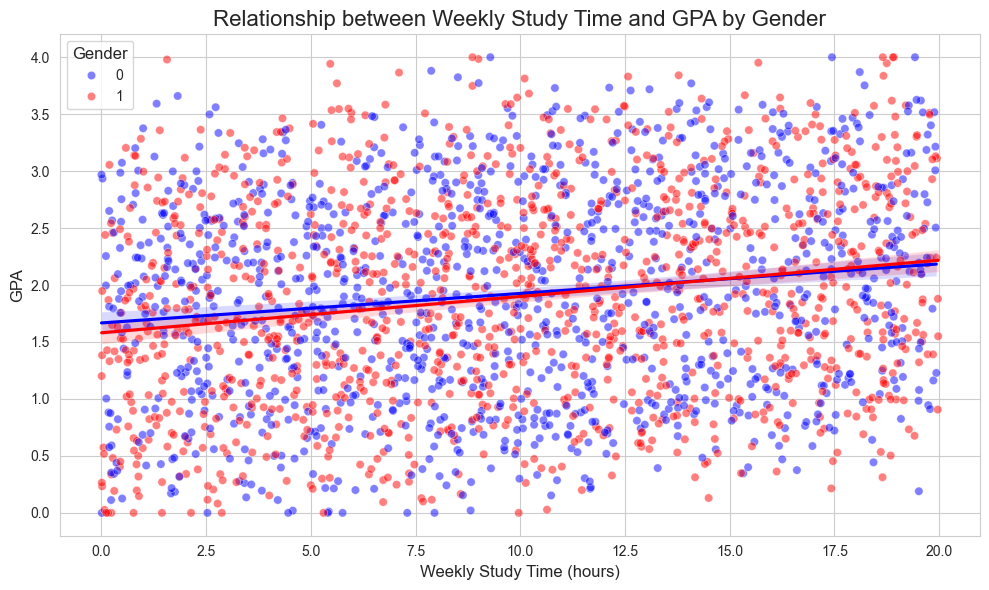

In [14]:
# Question: Is there a relationship between weekly study time and GPA, and how does it vary by gender?
# Let's create a scatter plot of StudyTimeWeekly vs. GPA, color-coded by Gender, with separate trend lines for each gender.

sns.set_style("whitegrid")

# Filter for Male and Female
df_male = df_copy[df_copy['Gender'] == 0]
df_female = df_copy[df_copy['Gender'] == 1]

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='StudyTimeWeekly', y='GPA', hue='Gender', data=df_copy, alpha=0.5, palette=['blue', 'red'])

# Plot trend lines
sns.regplot(x='StudyTimeWeekly', y='GPA', data=df_male, scatter=False, color='blue')
sns.regplot(x='StudyTimeWeekly', y='GPA', data=df_female, scatter=False, color='red')

# Customize the plot
plt.title('Relationship between Weekly Study Time and GPA by Gender', fontsize=16)
plt.xlabel('Weekly Study Time (hours)', fontsize=12)
plt.ylabel('GPA', fontsize=12)
plt.legend(title='Gender', title_fontsize='12', fontsize='10')

# Show the plot
plt.tight_layout()
plt.show()

* Positive correlation: There is a clear positive correlation between Weekly Study Time and GPA for both genders. As study time increases, there’s a general trend of increasing GPA.

* Weak to moderate relationship: The correlation appears to be weak to moderate, as there is considerable scatter around the trend lines. This suggests that while study time influences GPA, other factors also play significant roles.

* Similar trends across genders: The trend lines for both genders (blue for 0, likely male, and red for 1, likely female) are very close to each other and have similar slopes. This indicates that the relationship between study time and GPA is relatively consistent across genders.

* Wide range of GPAs: For any given amount of study time, there is a wide range of GPAs. This reinforces the idea that factors other than just study time influence academic performance.

* Diminishing returns: The trend lines appear to flatten slightly at higher study times, suggesting possible diminishing returns on increased study time beyond a certain point.

* Outliers: There are some notable outliers, particularly students with high GPAs (near 4.0) across various study times, and some with very low GPAs despite significant study time.

* Concentration of data: There seems to be a higher concentration of data points in the 5-15 hours per week study time range, suggesting this might be a common study time range for many students.

* Gender distribution: The distribution of data points for both genders appears fairly even throughout the plot, indicating no major differences in study habits or GPA outcomes between genders.

* Variability: There’s considerable variability in GPA for students with similar study times, highlighting the complexity of factors influencing academic performance.

While there is a positive relationship between study time and GPA, this relationship is not extremely strong, and it appears to be similar for both genders. The wide scatter suggests that other factors, beyond just study time, play important roles in determining a student’s GPA.

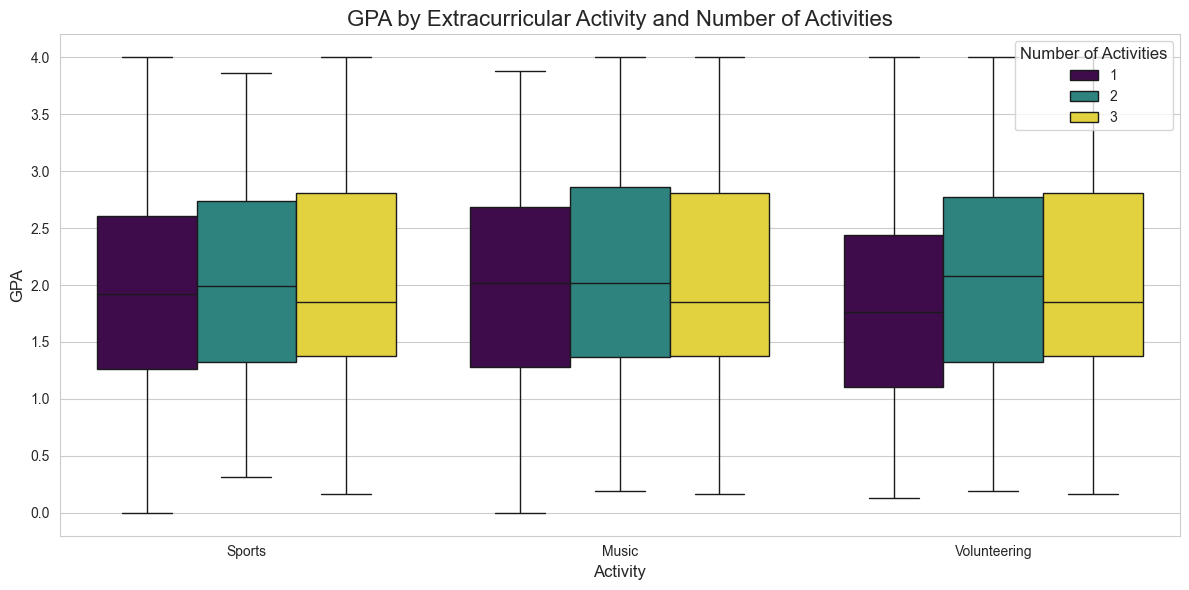

In [15]:
# Question: How does participation in different extracurricular activities (Sports, Music, Volunteering) affect GPA?
# Let's create a grouped box plot of GPA for each activity, with an additional group for students involved in multiple activities.

# Create a new column for the number of activities
df['NumActivities'] = df[['Sports', 'Music', 'Volunteering']].sum(axis=1)

# Create separate dataframes for each activity
sports_df = df[df['Sports'] == 1][['GPA', 'NumActivities']].assign(Activity='Sports')
music_df = df[df['Music'] == 1][['GPA', 'NumActivities']].assign(Activity='Music')
volunteering_df = df[df['Volunteering'] == 1][['GPA', 'NumActivities']].assign(Activity='Volunteering')

# Combine the dataframes
combined_df = pd.concat([sports_df, music_df, volunteering_df])

# Create a grouped box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Activity', y='GPA', hue='NumActivities', data=combined_df, palette='viridis')

# Customize the plot
plt.title('GPA by Extracurricular Activity and Number of Activities', fontsize=16)
plt.xlabel('Activity', fontsize=12)
plt.ylabel('GPA', fontsize=12)
plt.legend(title='Number of Activities', title_fontsize='12', fontsize='10')

# Show the plot
plt.tight_layout()
plt.show()

* Slight upward trend: There seems to be a weak positive correlation between the number of extracurricular activities and GPA. Students involved in 3 activities generally have slightly higher median GPAs across all activity types. However, this isn't a strong or consistent pattern.
* GPA variation: There's a noticeable range in GPA within each group, suggesting that extracurricular involvement isn't the sole determinant of academic performance. Factors like individual study habits, inherent aptitude, and socioeconomic conditions likely play a significant role.
* No outliers: The absence of significant outliers indicates a fairly consistent distribution of data.

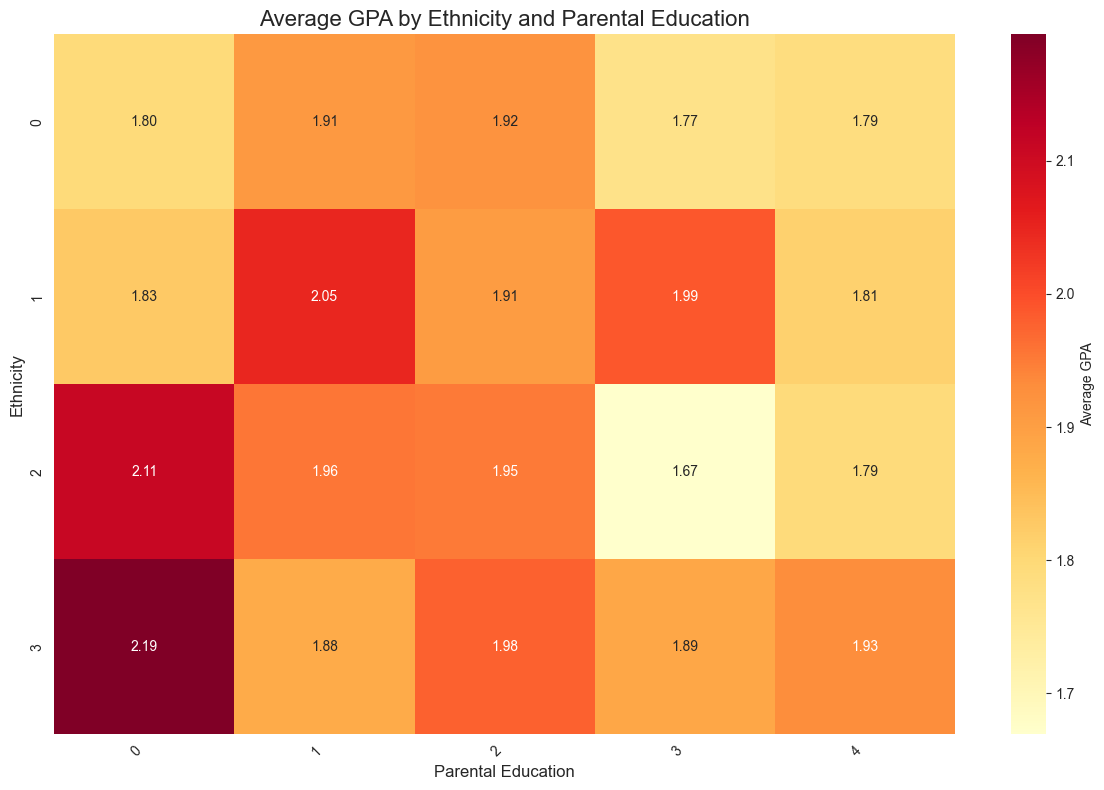

In [16]:
# Question: Is there a relationship between ethnicity, parental education, and academic performance?
# Let's create a heatmap showing average GPA for each combination of Ethnicity and ParentalEducation.

# Create a pivot table for the heatmap
heatmap_data = df_copy.pivot_table(values='GPA', index='Ethnicity', columns='ParentalEducation', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt='.2f', cbar_kws={'label': 'Average GPA'})

# Customize the plot
plt.title('Average GPA by Ethnicity and Parental Education', fontsize=16)
plt.xlabel('Parental Education', fontsize=12)
plt.ylabel('Ethnicity', fontsize=12)

# Rotate x-axis labels if they overlap
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

* Higher Parental Education, Higher GPA: There's a general trend suggesting that students whose parents have higher levels of education tend to have higher GPAs. This is visible as you move from left to right across the heatmap, with the colors generally shifting from lighter (lower GPA) to darker (higher GPA).
* Ethnicity 2 and Higher GPA: Students in Ethnicity group 2 consistently demonstrate higher GPAs across all parental education levels. This is evident in the darker red shades in row 2.
* Ethnicity 0 and Lower GPA: Ethnicity group 0 generally shows lower GPAs, especially when combined with lower parental education levels (lighter shades in the top row).

### Specific Observations:

* Highest GPA: The highest average GPA (2.19) is observed for Ethnicity 3 with the lowest parental education level (0). This is an interesting outlier and warrants further investigation to understand the factors contributing to this.
* Lowest GPA: The lowest average GPA (1.67) is seen for Ethnicity 2 with parental education level 3. This is another point that deserves a deeper look to understand the potential reasons behind it.

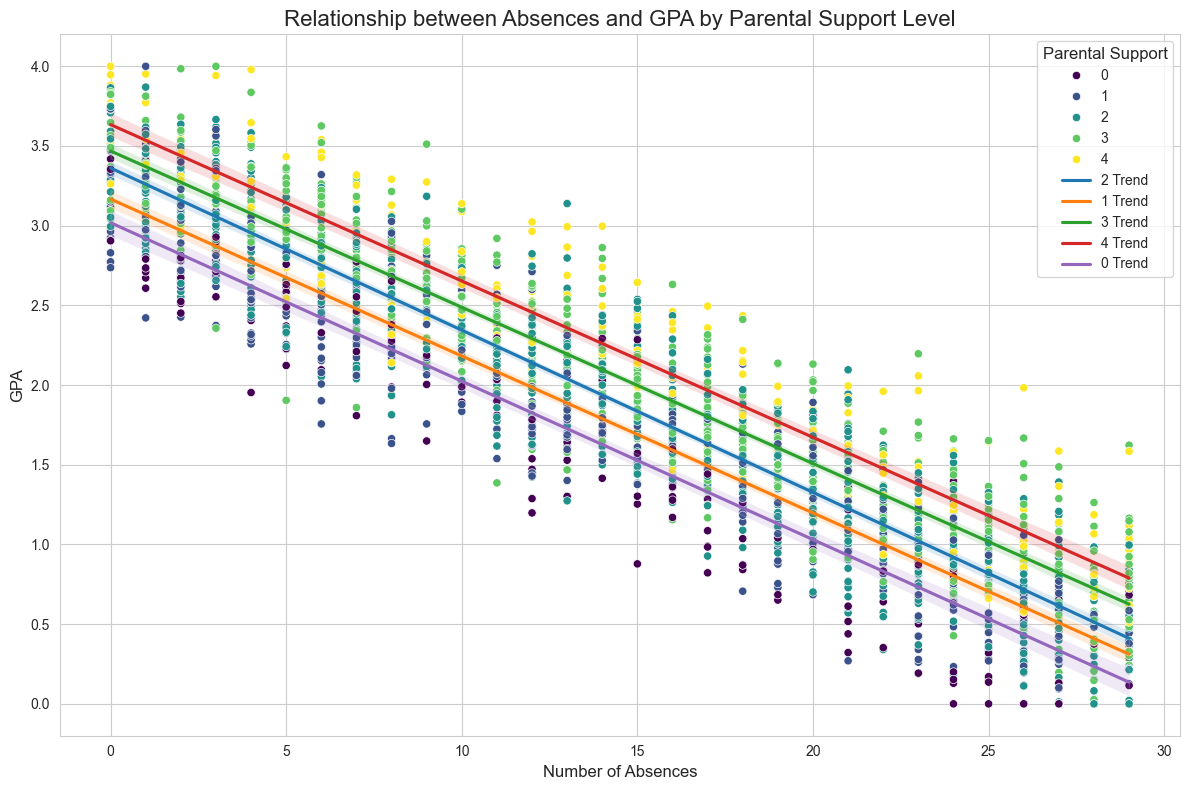

In [17]:
# Question: How does the number of absences correlate with GPA, and does this relationship vary by parental support level?
# Let's create a scatter plot of Absences vs. GPA, color-coded by ParentalSupport level, with separate trend lines for each support level.

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df, x='Absences', y='GPA', hue='ParentalSupport', palette='viridis')

# Add trend lines for each ParentalSupport level
support_levels = df_copy['ParentalSupport'].unique()
for level in support_levels:
    sns.regplot(data=df_copy[df_copy['ParentalSupport'] == level], x='Absences', y='GPA', 
                scatter=False, label=f'{level} Trend')

# Customize the plot
plt.title('Relationship between Absences and GPA by Parental Support Level', fontsize=16)
plt.xlabel('Number of Absences', fontsize=12)
plt.ylabel('GPA', fontsize=12)
plt.legend(title='Parental Support', title_fontsize='12', fontsize='10')

# Show the plot
plt.tight_layout()
plt.show()

### General Trends:

* Negative Correlation: As the number of absences increases, GPA tends to decrease. This suggests a negative correlation between the two variables, regardless of parental support level.
* Parental Support Impact: Students with higher levels of parental support generally have higher GPAs, even with the same number of absences. This is apparent by the vertical separation of the colored clusters and their respective trend lines. Higher parental support corresponds to higher overall GPA.
### Trend Line Analysis:

* Varying Slopes: The slopes of the trend lines for different parental support levels appear to vary slightly. This suggests that the impact of absences on GPA might differ depending on the level of parental support. For example, the trend line for the lowest support level (0) seems steeper, indicating a potentially stronger negative impact of absences on GPA for those students.
* Intercepts: The y-intercepts of the trend lines also vary. This indicates that even with zero absences, the starting GPA differs based on parental support. Students with higher support levels tend to begin with a higher GPA.
### Possible Explanations:

* Academic Engagement: Parental support can foster academic engagement, motivation, and better study habits, contributing to higher GPAs. This support may buffer the negative impact of absences.
* External Factors: Absences can be due to various reasons (illness, family issues, etc.). Students with strong parental support might have better resources and support systems to mitigate the academic consequences of these absences.
* Home Environment: A supportive home environment can provide stability and reduce stress, indirectly benefiting academic performance.
### Further Considerations:

* Causation: Correlation doesn't necessarily imply causation. While the plot shows a relationship, further investigation is needed to determine if parental support directly causes higher GPAs or if other factors are involved.
* Support Type: The plot doesn't specify the types of parental support. Different types of support (emotional, academic, financial) might have varying influences on GPA.
* Other Factors: Other factors, such as student motivation, teacher quality, and school resources, can also influence GPA.

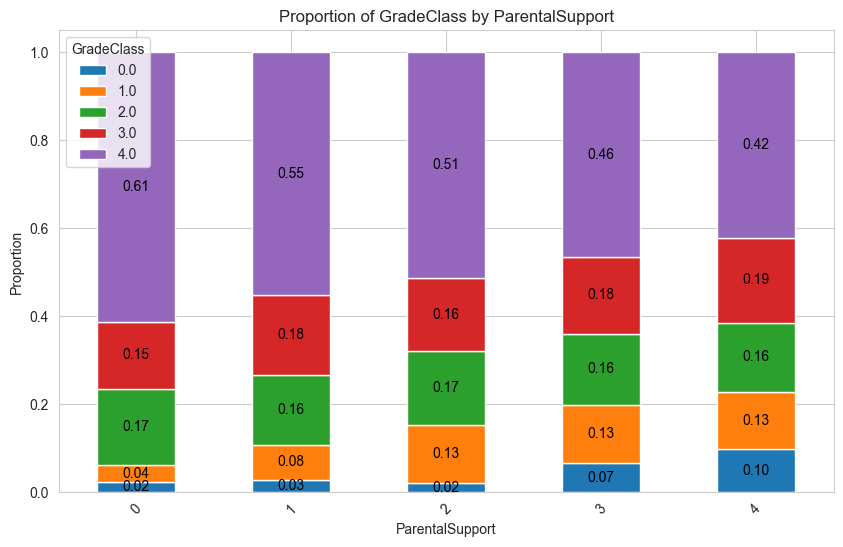

In [18]:
# Question: What is the distribution of GradeClasses across different levels of parental support?
# Let's create a stacked bar chart showing the proportion of each GradeClass for different ParentalSupport levels.

# Create a crosstab
crosstab = pd.crosstab(df_copy['ParentalSupport'], df_copy['GradeClass'], normalize='index')

# Plot the stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
# Add the counts for each category at the top of each segment
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x()+p.get_width()/2, p.get_y() + p.get_height()/2), 
                       ha='center', va='center', color='black')
plt.title('Proportion of GradeClass by ParentalSupport')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

* Positive correlation: There’s a clear positive relationship between parental support and academic performance. As parental support increases from none (0) to very high (4), the proportion of higher grades (A’s and B’s) generally increases, while the proportion of lower grades (D’s and F’s) decreases.

* Significant impact on F grades: The most dramatic change is seen in the proportion of F grades (purple). It decreases substantially from 61% for no parental support to 42% for very high parental support.

* Increase in A grades: The proportion of A grades (blue) shows a consistent increase as parental support increases, from 2% with no support to 10% with very high support.

* Moderate grades stabilize: The proportions of B and C grades (orange and green) remain relatively stable across different levels of parental support, with slight increases as support increases.

* Threshold effect: There appears to be a notable improvement in grade distribution when moving from no support (0) to low support (1), suggesting that even a small amount of parental support can have a significant impact.

* Diminishing returns: The rate of improvement in grade distribution seems to slow down at higher levels of parental support, particularly between high (3) and very high (4) support levels.

* Persistent challenges: Even with very high parental support, a significant proportion of students (42%) still receive F grades, indicating that while parental support is important, other factors also play crucial roles in academic performance.

* Largest impact on extreme grades: The most substantial changes are seen in the A and F grade categories, while middle grades (B, C, D) show less dramatic shifts.

* Complexity of factors: The presence of all grade levels across all support levels suggests that parental support, while influential, is not the sole determinant of academic performance.

# Hypothesis Testing

,sum_sq,df,F,PR(>F)
C(ParentalEducation),6.05,4.00,1.81,0.12
Residual,1996.44,2387.00,NaN,NaN


p-value: 0.12448408765780827


<Figure size 1000x600 with 0 Axes>

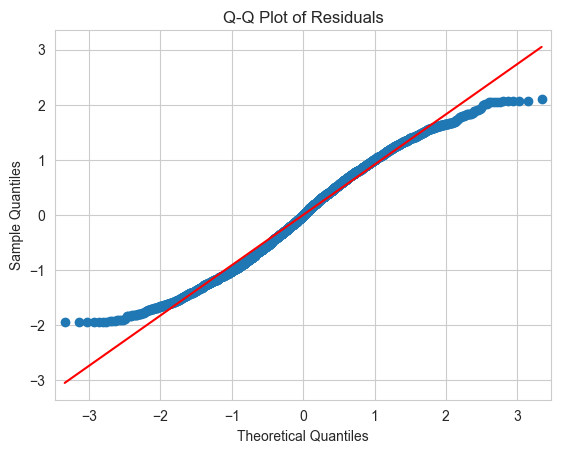

Normality test p-value: 4.8311928357663203e-60
The residuals do not appear to be normally distributed.
Levene's test p-value: 0.053763375247429655
The variances are homogeneous across groups.


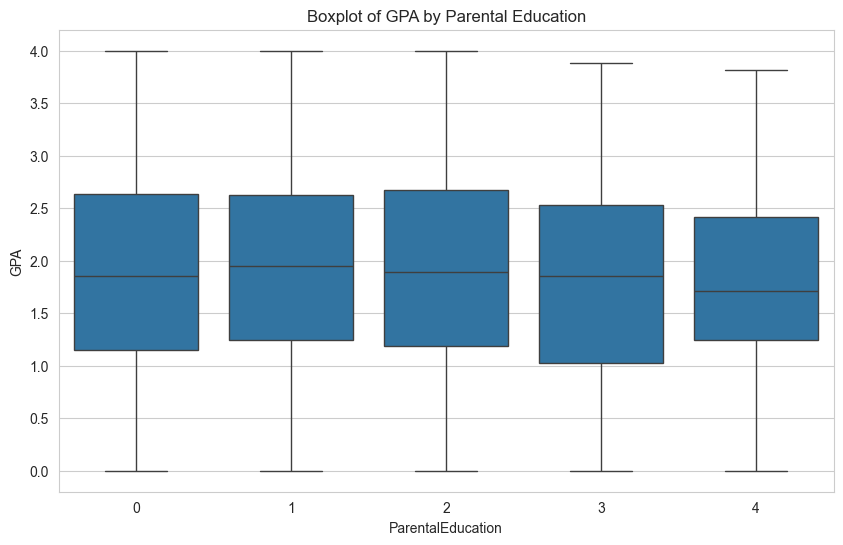

Fail to reject the null hypothesis: There is no significant difference in GPA across different parental education levels.

Note: Interpret the ANOVA results with caution if the assumptions are violated.


In [24]:
# Hypothesis: Parental education level affects student GPA.
# Null Hypothesis (H0): There is no significant difference in GPA across different parental education levels.
# Alternative Hypothesis (H1): There is a significant difference in GPA across different parental education levels.
# Test: One-way ANOVA

# Perform one-way ANOVA
model = ols('GPA ~ C(ParentalEducation)', data=df_copy).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
display(anova_table)

# Extract the p-value
p_value = anova_table['PR(>F)'][0]
print(f'p-value: {p_value}')

# Check ANOVA assumptions

# 1. Normality of residuals
residuals = model.resid
_, p_value_normality = stats.normaltest(residuals)

plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

print(f"Normality test p-value: {p_value_normality}")
if p_value_normality < 0.05:
    print("The residuals do not appear to be normally distributed.")
else:
    print("The residuals appear to be normally distributed.")

# 2. Homogeneity of variances (Levene's test)
groups = [group for _, group in df_copy.groupby('ParentalEducation')['GPA']]
_, p_value_levene = levene(*groups)

print(f"Levene's test p-value: {p_value_levene}")
if p_value_levene < 0.05:
    print("The variances are not homogeneous across groups.")
else:
    print("The variances are homogeneous across groups.")

# Visualize homogeneity of variances
plt.figure(figsize=(10, 6))
sns.boxplot(x='ParentalEducation', y='GPA', data=df_copy)
plt.title('Boxplot of GPA by Parental Education')
plt.show()

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in GPA across different parental education levels.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in GPA across different parental education levels.")

print("\nNote: Interpret the ANOVA results with caution if the assumptions are violated.")

Kruskal-Wallis H-statistic: 6.567001182085958
p-value: 0.1606174191114544


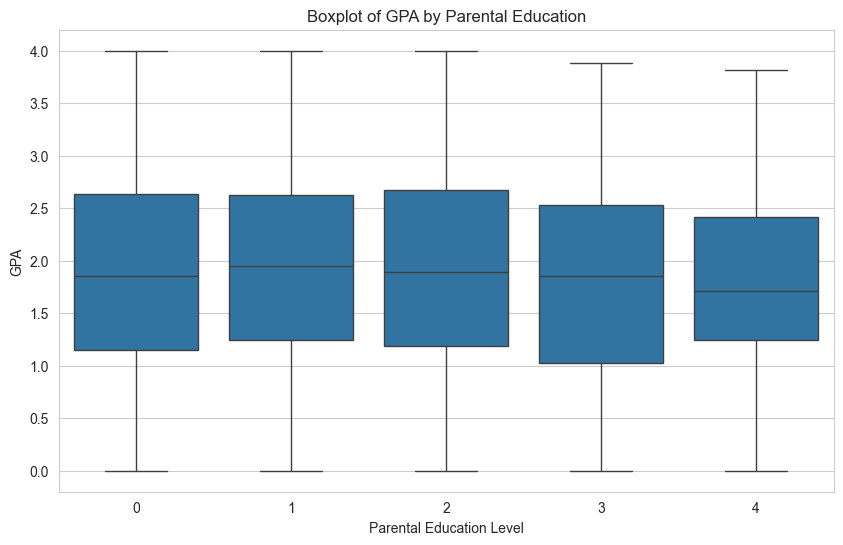

Fail to reject the null hypothesis: There is no significant difference in GPA across different parental education levels.


In [25]:
# Hypothesis: Parental education level affects student GPA.
# Null Hypothesis (H0): There is no significant difference in GPA across different parental education levels.
# Alternative Hypothesis (H1): There is a significant difference in GPA across different parental education levels.
# Test: Kruskal-Wallis H-test

# Prepare data for Kruskal-Wallis test
groups = [group for _, group in df_copy.groupby('ParentalEducation')['GPA']]

# Perform Kruskal-Wallis H-test
h_statistic, p_value = stats.kruskal(*groups)

print(f'Kruskal-Wallis H-statistic: {h_statistic}')
print(f'p-value: {p_value}')

# Visualize the distribution of GPA across parental education levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='ParentalEducation', y='GPA', data=df_copy)
plt.title('Boxplot of GPA by Parental Education')
plt.xlabel('Parental Education Level')
plt.ylabel('GPA')
plt.show()

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in GPA across different parental education levels.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in GPA across different parental education levels.")

# If the test is significant, perform post-hoc pairwise comparisons
if p_value < alpha:
    print("\nPerforming post-hoc pairwise comparisons:")
    from itertools import combinations
    from statsmodels.stats.multicomp import pairwise_tukeyhsd

    # Prepare data for pairwise comparisons
    pairwise_data = df_copy[['ParentalEducation', 'GPA']].values
    tukey_results = pairwise_tukeyhsd(pairwise_data[:, 1], pairwise_data[:, 0])
    
    print(tukey_results)

    # Visualize the pairwise comparisons
    plt.figure(figsize=(10, 6))
    tukey_results.plot_simultaneous()
    plt.title("Tukey's HSD Pairwise Comparisons")
    plt.show()


t-statistic: 0.6531957576950806
p-value: 0.5136929146255127
Cohen's d: 0.02671747485303595


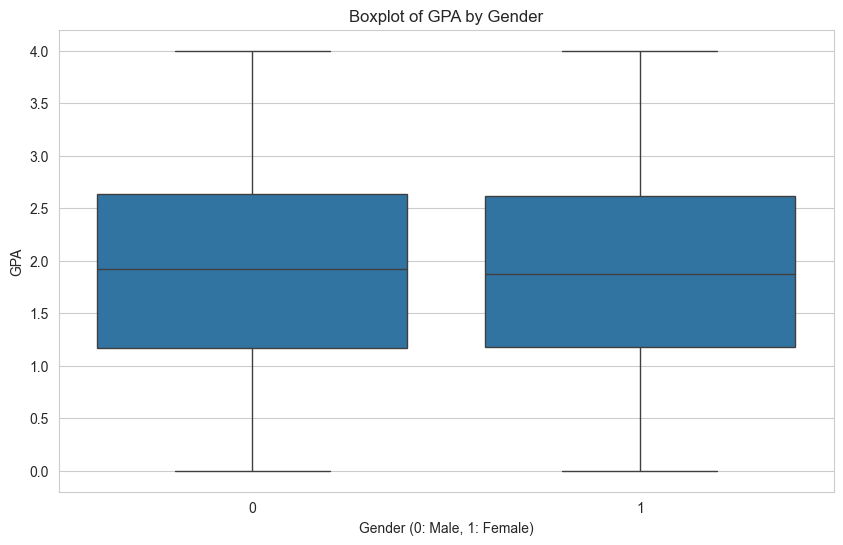

Fail to reject the null hypothesis: There is no significant difference in GPA between male and female students.
The effect size is small.

Note: Check assumptions of normality and homogeneity of variances for a more robust interpretation.

Normality Test:
Male GPA: p-value = 4.305574928218884e-11
Female GPA: p-value = 9.484194994395262e-10
The normality assumption may be violated. Consider non-parametric alternatives.

Homogeneity of Variances Test:
Levene's test: p-value = 0.8738018587494647


In [26]:
# Hypothesis: There is a gender difference in GPA. 
# Null Hypothesis (H0): There is no significant difference in GPA between male and female students.
# Alternative Hypothesis (H1): There is a significant difference in GPA between male and female students.
# Test: Independent samples t-test

# Separate the data into two groups
male_gpa = df_copy[df_copy['Gender'] == 0]['GPA']
female_gpa = df_copy[df_copy['Gender'] == 1]['GPA']

# Perform the independent samples t-test
t_statistic, p_value = stats.ttest_ind(male_gpa, female_gpa)

print(f't-statistic: {t_statistic}')
print(f'p-value: {p_value}')

# Calculate effect size (Cohen's d)
n1, n2 = len(male_gpa), len(female_gpa)
pooled_std = np.sqrt(((n1 - 1) * male_gpa.std()**2 + (n2 - 1) * female_gpa.std()**2) / (n1 + n2 - 2))
cohen_d = (male_gpa.mean() - female_gpa.mean()) / pooled_std

print(f"Cohen's d: {cohen_d}")

# Visualize the distribution of GPA for each gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='GPA', data=df_copy)
plt.title('Boxplot of GPA by Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('GPA')
plt.show()

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in GPA between male and female students.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in GPA between male and female students.")

# Interpret effect size
if abs(cohen_d) < 0.2:
    print("The effect size is small.")
elif abs(cohen_d) < 0.5:
    print("The effect size is medium.")
else:
    print("The effect size is large.")

print("\nNote: Check assumptions of normality and homogeneity of variances for a more robust interpretation.")

# Check assumptions
# 1. Normality (Shapiro-Wilk test)
_, p_male = stats.shapiro(male_gpa)
_, p_female = stats.shapiro(female_gpa)

print("\nNormality Test:")
print(f"Male GPA: p-value = {p_male}")
print(f"Female GPA: p-value = {p_female}")

if p_male < 0.05 or p_female < 0.05:
    print("The normality assumption may be violated. Consider non-parametric alternatives.")

# 2. Homogeneity of Variances (Levene's test)
_, p_levene = stats.levene(male_gpa, female_gpa)

print("\nHomogeneity of Variances Test:")
print(f"Levene's test: p-value = {p_levene}")

if p_levene < 0.05:
    print("The assumption of equal variances may be violated. Consider using Welch's t-test.")


Mann-Whitney U statistic: 726727.5
p-value: 0.4825496015386245
Effect size (r): 607.7753201409557


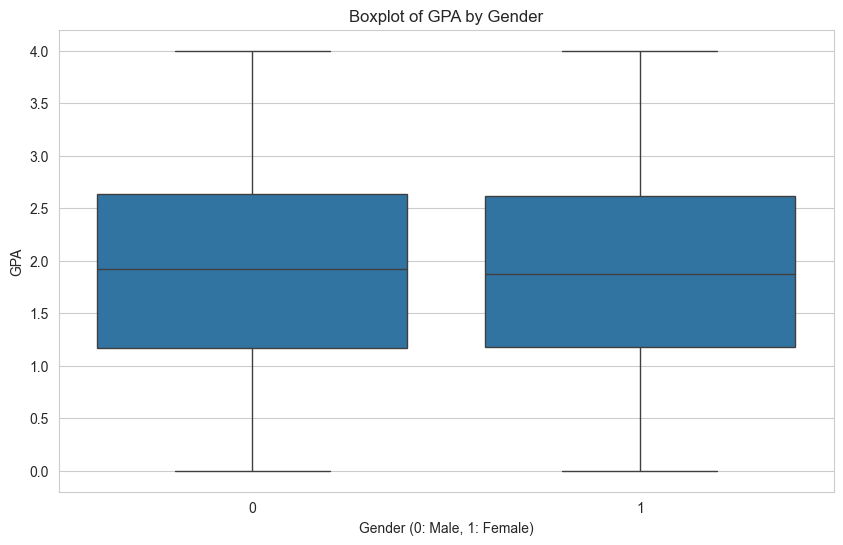

Fail to reject the null hypothesis: There is no significant difference in the distribution of GPA between male and female students.
The effect size is large.

Descriptive Statistics:
Male GPA:
count   1170.00
mean       1.92
std        0.91
min        0.00
25%        1.17
50%        1.92
75%        2.63
max        4.00
Name: GPA, dtype: float64

Female GPA:
count   1222.00
mean       1.89
std        0.92
min        0.00
25%        1.18
50%        1.88
75%        2.61
max        4.00
Name: GPA, dtype: float64


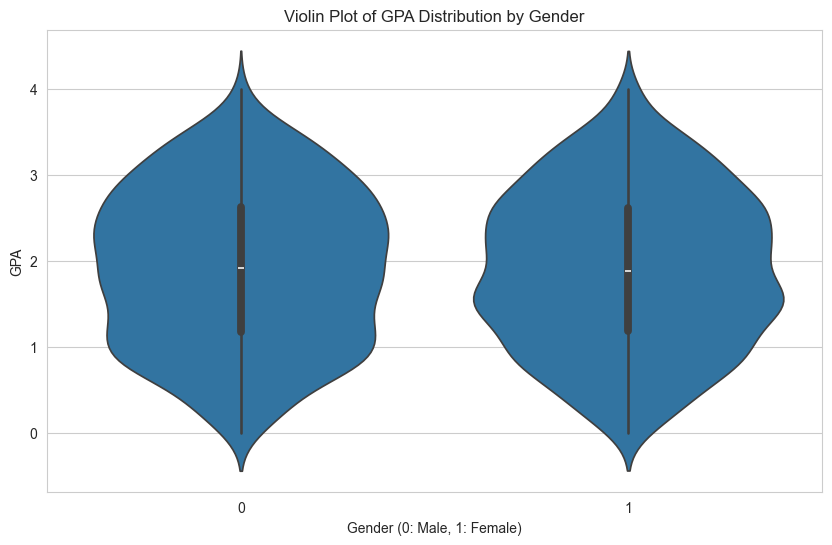

In [27]:
# Hypothesis: There is a gender difference in GPA.
# Null Hypothesis (H0): There is no significant difference in the distribution of GPA between male and female students.
# Alternative Hypothesis (H1): There is a significant difference in the distribution of GPA between male and female students.
# Test: Mann-Whitney U test

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(male_gpa, female_gpa, alternative='two-sided')

print(f'Mann-Whitney U statistic: {statistic}')
print(f'p-value: {p_value}')

# Calculate effect size (r)
n1, n2 = len(male_gpa), len(female_gpa)
r = statistic / np.sqrt(n1 * n2)

print(f"Effect size (r): {r}")

# Visualize the distribution of GPA for each gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='GPA', data=df_copy)
plt.title('Boxplot of GPA by Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('GPA')
plt.show()

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the distribution of GPA between male and female students.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the distribution of GPA between male and female students.")

# Interpret effect size
if abs(r) < 0.1:
    print("The effect size is negligible.")
elif abs(r) < 0.3:
    print("The effect size is small.")
elif abs(r) < 0.5:
    print("The effect size is medium.")
else:
    print("The effect size is large.")

# Additional descriptive statistics
print("\nDescriptive Statistics:")
print("Male GPA:")
print(male_gpa.describe())
print("\nFemale GPA:")
print(female_gpa.describe())

# Visualize the distribution with a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='GPA', data=df_copy)
plt.title('Violin Plot of GPA Distribution by Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('GPA')
plt.show()
